# Testing how function declarations can slow down loops

I wanted to know how much slower a loop runs if an operation is abstracted into a function. I tested this by creating a function that does nothing but return the input, and then running a loop that calls that function.

It seems that the function call is not a not a significant overhead for this simple case. But what about nested functions in nested loops?


In [1]:
import timeit
import matplotlib.pyplot as plt

In [2]:
def busy_work(num):
    return num + 1

Initialise the input arrays

In [3]:
results_loop = []
results_loop_with_function = []

max_num = 100000
div = max_num // 10
x = range(0,max_num,div)

timeit_iterations = 1000

Crunch the numbers 

In [4]:
for i in x:
    results_loop.append(timeit.timeit("for num in range(0,"+str(i)+"): a = a + 1", number=timeit_iterations, setup="a = 0"))
    results_loop_with_function.append(timeit.timeit("for num in range(0,"+str(i)+"): a = busy_work(a)", number=timeit_iterations, setup="from __main__ import busy_work; a = 0"))
    print("Loop size: " + str(i) + " / " + str(max_num) + "   normal loop is {} times faster than loop with function".format(results_loop_with_function[-1]/results_loop[-1]))


Loop size: 0 / 100000   normal loop is 1.014394672378432 times faster than loop with function
Loop size: 10000 / 100000   normal loop is 2.244825457863768 times faster than loop with function
Loop size: 20000 / 100000   normal loop is 2.291423466231766 times faster than loop with function
Loop size: 30000 / 100000   normal loop is 2.226239632730982 times faster than loop with function
Loop size: 40000 / 100000   normal loop is 2.332858294755286 times faster than loop with function
Loop size: 50000 / 100000   normal loop is 2.3388644538480703 times faster than loop with function
Loop size: 60000 / 100000   normal loop is 2.3610812693882512 times faster than loop with function
Loop size: 70000 / 100000   normal loop is 2.3533071776357475 times faster than loop with function
Loop size: 80000 / 100000   normal loop is 2.325384993566371 times faster than loop with function
Loop size: 90000 / 100000   normal loop is 2.424588137210641 times faster than loop with function


Graph the results

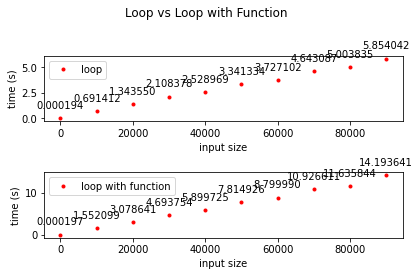

In [5]:
y1 = results_loop
y2 = results_loop_with_function

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Loop vs Loop with Function')
ax1.plot(x,y1, 'r.', label="loop")
ax1.set(xlabel='input size', ylabel='time (s)')
ax1.legend()
ax2.plot(x,y2, 'r.', label="loop with function")
ax2.set(xlabel='input size', ylabel='time (s)')
ax2.legend()

# space the plots out a bit
fig.tight_layout(pad=2.0)

# annotate the points with their values
for x,y in zip(x,y1):
    label = "{:f}".format(y)
    ax1.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

# reset x iterator
x = range(0,max_num,div)

for x,y in zip(x,y2):
    label = "{:f}".format(y)
    ax2.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()